In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

# Creating dataset

In [ ]:
nclass = 200

In [ ]:
x1 = np.random.randn(nclass ,2) + [-1 , -2]
x2 = np.random.randn(nclass ,2) + [2 , 2]
x3 = np.random.randn(nclass ,2) + [-2 , 4]
x4 = np.random.randn(nclass ,2) + [5 , 5]
x5 = np.random.randn(nclass ,2) + [ 5 ,-2 ]

In [ ]:
X = np.concatenate((x1 , x2 ,x3 , x4 ,x5))

In [ ]:
Y = np.array([0]*nclass + [1]*nclass +[2]*nclass + [3]*nclass + [4]*nclass)

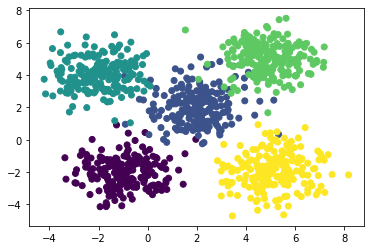

In [ ]:
plt.scatter(X[: ,0] , X[: ,1] , c = Y  )

In [ ]:
set(Y)

{0, 1, 2, 3, 4}

# Writing a class for artificial neural networks with one output layer and one hidden layer 

In [ ]:
class Ann:
  def __init__(self , X , t ):
    self.X = np.insert(X ,0 , np.ones(X.shape[0]) , axis = 1)  # adding bias term by adding np.ones column

    # one hot encoding for target
    self.T = np.zeros((len(t) , len(set(t))))
    for i in range(len(t)):
        self.T[i , t[i]] = 1
  
    # spliting train and test split

    self.xtrain  , self.xtest , self.ytrain , self.ytest = train_test_split(self.X , self.T , test_size = 0.2)
   
    # defining shapes
    self.D = self.xtrain.shape[1]
    self.M =5
    self.K = self.ytrain.shape[1]

   # initializing weights
    self.W1 = np.random.randn(self.D , self.M )
    self.W2 = np.random.randn(self.M , self.K )

    # empty list for appending costs
    
    self.costs = []

  
  def sigmoid(self, x):
    return (1 / (1 + np.exp(-(x))))

  def softmax(self , x):
    expA = np.exp(x)
    return (expA / expA.sum(axis = 1 , keepdims = True))

  def forward(self , W1 , W2  , X  ):
    z = self.sigmoid(X.dot(W1))
    Y = self.softmax(z.dot(W2))
    return z , Y

  @staticmethod
  def derivative_w2(Z , Y, T):
    return Z.T.dot(T-Y)

  @staticmethod
  def derivative_w1(X , Z , Y , T , w2):
    d2 = (T - Y).dot(w2.T) * Z *(1-Z)
    return X.T.dot(d2)

  @staticmethod
  def cost(T , Y):
    return (T*np.log(Y)).sum()

  def plot_cost(self):
     plt.plot(np.array(self.costs)[: ,0] , np.array(self.costs)[: ,1])
  

  def train(self , W1 , W2 , X , T, epochs = 200000 , learning_rate = 10e-6):
    """ T = original targets"""
    for i in range(epochs):

      hidden , output = self.forward(self.W1 , self.W2 , X)

      self.W2 += learning_rate*self.derivative_w2(hidden , output , T) 
      self.W1 += learning_rate*self.derivative_w1(X , hidden , output , T , self.W2)
      
      if (i%1000 == 0):
        c = self.cost(T , output)
        print(c)
        self.costs.append([i , c])
  
  def score(self , Y ,  T):
    T = np.argmax(T ,axis = 1) # reversing the one hot encoding
    return np.mean(T == Y)

  # lets fit train and test data to see how our model performed
  
  def main(self ):
    self.train(self.W1 , self.W2 , self.xtrain , self.ytrain ) # fitting xtrain and ytrain
    _ , ytrain = self.forward(self.W1 , self.W2 , self.xtrain)     # predicting ytrain[n , k]
    print("ytrain predicted values: \n",np.argmax(ytrain , axis = 1)) # converting ytrain[n ,k] to ytrain[n]
    self.plot_cost()      #plotting the cost(categorical cross entropy) 
    print("train score:" , self.score(np.argmax(ytrain , axis =1) , self.ytrain))  # train score
    _ , ytest = self.forward(self.W1 , self.W2 , self.xtest)  # predicting ytest[n,k] based on trained weights
    print("test score:" , self.score(np.argmax(ytest , axis =1) , self.ytest))  # test score
    

In [ ]:
a = Ann(X ,Y)

-1675.6451967509934
-541.8437940550988
-419.4047509889296
-354.79558025546567
-312.30468009881315
-281.36250923581315
-257.28711646002716
-237.74441622007467
-221.437993404138
-207.57386917872776
-195.62453642694695
-185.2160037681997
-176.06987725017518
-167.9716315542442
-160.75189901005467
-154.27451747088514
-148.428372049651
-143.12167588632917
-138.2780441803772
-133.83394045086754
-129.73706733741898
-125.94517563811105
-122.42476015103381
-119.14945205749612
-116.09843692680795
-113.25520726187395
-110.60639218019897
-108.14031916555743
-105.84556270380975
-103.7100676713965
-101.72108094801592
-99.86562588303731
-98.13110295554876
-96.50574957931029
-94.9788876418181
-93.54099609074117
-92.18367289804827
-90.89954012701412
-89.68212732365112
-88.52575327999469
-87.42541621421148
-86.37669649906661
-85.37567283663837
-84.41885115729951
-83.5031048228736
-82.62562451611873
-81.78387625393823
-80.97556612946772
-80.19861059197899
-79.45111127436786
-78.731333558182
-78.0376882196

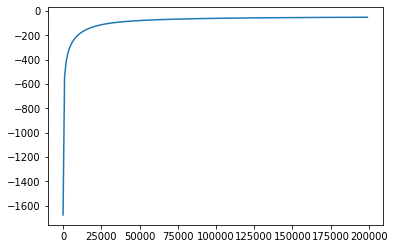

In [ ]:
a.main()

# conclusion:

## --> According to the above cost graph , train score and test score our model's preformance is good